In [15]:
import torch
import pypose as pp
import numpy as np
import matplotlib.pyplot as plt

In [49]:
imu = np.loadtxt('/home/ilari/Downloads/indoor_forward_6_snapdragon_with_gt/imu.txt')[:, 1:]
dt = torch.tensor(imu[1:,0] - imu[:-1,0]).unsqueeze(1).float().unsqueeze(0)
gyro = torch.tensor(imu[:-1, [1,2,3]]).float().unsqueeze(0)
acc = torch.tensor(imu[:-1, [4,5,6]]).float().unsqueeze(0)

integrator = pp.module.IMUPreintegrator(gyro_cov=0.05, acc_cov=0.1, reset=False)

In [50]:
dt.shape, gyro.shape, acc.shape

(torch.Size([1, 34814, 1]),
 torch.Size([1, 34814, 3]),
 torch.Size([1, 34814, 3]))

In [51]:
state = integrator(dt=dt, 
        gyro=gyro,
        acc=acc)

pos = state['pos'][0]

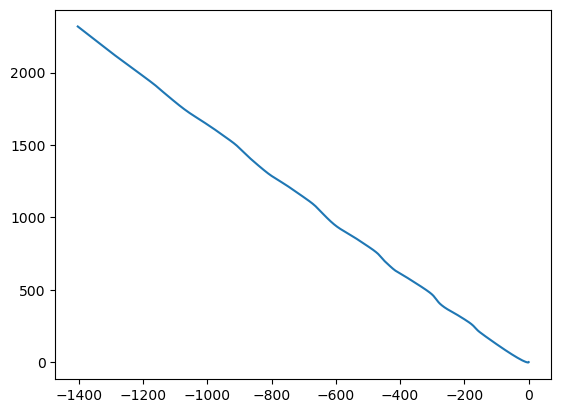

In [53]:
plt.plot(pos[:,0], pos[:,1])